# Random Forest 

In [ ]:

# Author: Arnova Abdullah
# Date: 15-05-2022
# Description: Code for creating and evaluating Random Forest Model for stratified training set (X_train, y_train)


## Importing modules

In [24]:
# Run this cell to import the following modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# Importing modules for Random Forest evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc

In [26]:
# Importing modules for performance evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

## Loading data 

In [16]:
# Loading training data set X_train

df_X_train = pd.read_csv('data/X_train.csv')
df_X_train.head()
df_X_train.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,0.545470,0.612834,-8.982465,0.671667,0.065199,0.307284,0.186638,0.189256,0.463674,120.064385,3.901979
std,0.165848,0.278718,6.621223,0.469631,0.063287,0.351468,0.335499,0.166912,0.247005,29.691944,0.412933
min,0.060800,0.000707,-47.898000,0.000000,0.022700,0.000001,0.000000,0.009670,0.024100,35.995000,0.000000
25%,0.441000,0.434000,-10.300750,0.000000,0.034200,0.012300,0.000000,0.094475,0.265000,96.919000,4.000000
50%,0.555000,0.677000,-6.795000,1.000000,0.043800,0.128000,0.000116,0.120000,0.460000,120.046500,4.000000
75%,0.662000,0.843000,-4.862000,1.000000,0.066300,0.589250,0.137000,0.227000,0.653000,138.039000,4.000000
max,0.982000,0.999000,1.023000,1.000000,0.926000,0.996000,0.993000,0.992000,0.981000,213.087000,5.000000


In [11]:
# Loading test data set X_test

df_X_test = pd.read_csv ('data/X_test.csv')
df_X_test.head ()
df_X_test.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.547429,0.609217,-9.015305,0.654583,0.064770,0.310083,0.186276,0.190372,0.461078,120.030679,3.913333
std,0.167127,0.276438,6.641076,0.475603,0.061467,0.351436,0.335716,0.162736,0.253549,29.522751,0.364066
min,0.067100,0.001610,-40.563000,0.000000,0.022400,0.000002,0.000000,0.021100,0.028700,50.917000,1.000000
25%,0.444000,0.425000,-10.314500,0.000000,0.034175,0.013000,0.000000,0.095075,0.249750,97.012750,4.000000
50%,0.557500,0.663500,-6.858500,1.000000,0.043900,0.130000,0.000168,0.123000,0.450000,119.974000,4.000000
75%,0.665000,0.842000,-4.934750,1.000000,0.065525,0.599000,0.144750,0.237000,0.659000,138.009000,4.000000
max,0.967000,0.999000,2.098000,1.000000,0.824000,0.996000,0.987000,0.990000,0.981000,210.857000,5.000000


In [13]:
# Loading test data set y_test

df_y_test = pd.read_csv ('data/y_test.csv')
df_y_test.head ()
df_y_test.describe()

,genre
count,2400
unique,10
top,country
freq,240


In [15]:
# Loading training data set y_train

df_y_train = pd.read_csv ('data/y_train.csv')
df_y_train.head ()
df_y_train.describe()

,genre
count,9600
unique,10
top,jazz
freq,960


## Training the model using Random Forest

In [18]:
# Using OneVsRestClassifier to train training set
model = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
model.fit (df_X_train, df_y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=0.2))

## Performance evaluation

### 1. Accuracy Score measurement (Training set)

In [19]:
y_train_pred = model.predict (df_X_train)
train_accuracy = accuracy_score (y_true = df_y_train, y_pred = y_train_pred)
train_accuracy

0.9232291666666667

### 2. Accuracy Score measurement (Test set)

In [20]:
y_test_pred = model.predict (df_X_test)
test_accuracy = accuracy_score (y_true = df_y_test, y_pred = y_test_pred)
test_accuracy

0.4716666666666667

### 3. Confusion matrix evaluation

In [21]:
print(confusion_matrix(df_y_train, y_train_pred))

[[945  12   0   1   0   0   0   1   1   0]
 [ 20 892   1   3   0  13   1   3  27   0]
 [  0   1 957   0   0   1   1   0   0   0]
 [  0   1   0 928   2   0   0   1  28   0]
 [  2   0   0   5 857   0   2  80  13   1]
 [  0   7   3   0   0 948   0   0   0   2]
 [  0   5   0   3   1   0 915   2  34   0]
 [  1   3   0   2 108   0   9 745  91   1]
 [  6  22   0  38  19   0  64  91 720   0]
 [  0   0   1   0   2   1   0   0   0 956]]


<AxesSubplot:>

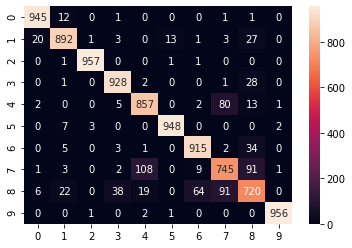

In [29]:
sns.heatmap(confusion_matrix(df_y_train, y_train_pred), annot=True, fmt="d")

### 4. Cross validation score

In [30]:
cross_val_score(model, df_X_train, df_y_train, cv=3, scoring='accuracy')

array([0.47125  , 0.469375 , 0.4865625])